<h1>1. Import</h1>

In [1]:
#import des librairies
%pylab inline
import numpy as np 
import pandas as pd 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from textblob import Word
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
from nltk.stem.snowball import FrenchStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import FrenchStemmer
from spellchecker import SpellChecker
from textblob import TextBlob
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC
import sklearn.naive_bayes as nb
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from xgboost import plot_importance, to_graphviz
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, auc, precision_score, recall_score
from sklearn import feature_extraction, model_selection, svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from gensim.utils import tokenize
from gensim.models import word2vec
from nltk.tokenize import sent_tokenize


Populating the interactive namespace from numpy and matplotlib


In [2]:
#ignore les warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#chargement des données
#remplacement de None par NaN
#décimal avec un point plutôt qu'une virgule dans le dataframe afin que les variables soient de type float
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')

In [4]:
#affichage des 5 premières lignes du dataframe
df.head()

,nom,pays,favorite,date,titre,bons_points,mauvais_points,note,type_etablissement,lieu,note_etablissement
0,Loshouarn,France,1,2018-06-28,Le confort comme à la maison !,J'ai énormément apprécié l'accueil et je me su...,NaN,10.0,Hôtel,Paris,8.1
1,Isabelle,France,0,2020-05-22,Calme et confortable.,"Très bon accueil, Hatim le réceptionniste est ...",NaN,8.0,Hôtel,Paris,8.1
2,Eva,Italie,0,2020-05-20,Accueil chaleureux,- Personnel irréprochable : surtout l’homme et...,- le rapport qualité prix pour la chambre supé...,8.0,Hôtel,Paris,8.1
3,François,France,0,2020-05-19,Très correct,"Merci a Hatim pour l'accueil, très appréciable...",NaN,8.0,Hôtel,Paris,8.1
4,Fabienne,France,0,2020-05-17,Très bien,"L’accueil , la situation de l’établissement",La fenêtre qui ne fermait pas très bien,8.0,Hôtel,Paris,8.1


<h1>2. Exploration et nettoyage des données</h1>

In [5]:
#dimensions du dataframe
print('Le dataset a {} lignes et {} colonnes.'.format(df.shape[0], df.shape[1]))

Le dataset a 389 lignes et 11 colonnes.


In [6]:
#affichage des variables
print('Les différents variables sont : {}.'.format(df.columns.tolist()))

Les différents variables sont : ['nom', 'pays', 'favorite', 'date', 'titre', 'bons_points', 'mauvais_points', 'note', 'type_etablissement', 'lieu', 'note_etablissement'].


In [7]:
#Existe-t-il des variables non renseignées?
df.isnull().values.any()

True

In [8]:
#affichage du nombre de valeurs manquantes selon chaque variable
df.isnull().sum()

nom                     0
pays                    0
favorite                0
date                    0
titre                   0
bons_points             0
mauvais_points        219
note                    0
type_etablissement      0
lieu                    0
note_etablissement      0
dtype: int64

In [9]:
#type de chaque variable
df.dtypes

nom                    object
pays                   object
favorite                int64
date                   object
titre                  object
bons_points            object
mauvais_points         object
note                  float64
type_etablissement     object
lieu                   object
note_etablissement    float64
dtype: object

In [10]:
#statistiques descriptives du dataset
df.describe(include='all')

,nom,pays,favorite,date,titre,bons_points,mauvais_points,note,type_etablissement,lieu,note_etablissement
count,389,389,389.000000,389,389,389,170,389.000000,389,389,3.890000e+02
unique,241,24,NaN,293,118,239,158,NaN,1,1,NaN
top,Anonyme,France,NaN,2019-02-24,Bien,Ce client n'a pas laissé de commentaire.,Rien,NaN,Hôtel,Paris,NaN
freq,31,323,NaN,4,71,146,10,NaN,389,389,NaN
mean,NaN,NaN,0.066838,NaN,NaN,NaN,NaN,8.278920,NaN,NaN,8.100000e+00
std,NaN,NaN,0.250063,NaN,NaN,NaN,NaN,1.331989,NaN,NaN,5.513798e-14
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,2.900000,NaN,NaN,8.100000e+00
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,7.500000,NaN,NaN,8.100000e+00
50%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,8.300000,NaN,NaN,8.100000e+00
75%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,9.200000,NaN,NaN,8.100000e+00


In [11]:
#suppression des accents
#cols = df.select_dtypes(include=[np.object]).columns
#df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
#df

In [12]:
#fonction pour générer un nuage de mots
def wcloud(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df.drop(['nom', 'pays', 'favorite', 'date', 'note', 'type_etablissement', 'lieu', 'note_etablissement'],1,inplace=True)
df.head()

,titre,bons_points,mauvais_points
0,Le confort comme à la maison !,J'ai énormément apprécié l'accueil et je me su...,NaN
1,Calme et confortable.,"Très bon accueil, Hatim le réceptionniste est ...",NaN
2,Accueil chaleureux,- Personnel irréprochable : surtout l’homme et...,- le rapport qualité prix pour la chambre supé...
3,Très correct,"Merci a Hatim pour l'accueil, très appréciable...",NaN
4,Très bien,"L’accueil , la situation de l’établissement",La fenêtre qui ne fermait pas très bien


In [15]:
#suppression des Nan
df = df.fillna('')
#suppression de deux phrases récurrentes dans les données
df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [16]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
for index, row in df.iterrows():
    print('index: ', index, 'col sentences:', row['titre'])

index:  0 col sentences: Le confort comme à la maison !
index:  1 col sentences: Calme et confortable.
index:  2 col sentences: Accueil chaleureux
index:  3 col sentences: Très correct
index:  4 col sentences: Très bien
index:  5 col sentences: Très bien
index:  6 col sentences: Fabuleux 
index:  7 col sentences: hôtel parfait pour un court séjour
index:  8 col sentences: Très bien
index:  9 col sentences: Agréable
index:  10 col sentences: Mouvementé durant la nuit, surtout après 34 hrs de vol + escales au retour de Colombie
index:  11 col sentences: Fabuleux 
index:  12 col sentences: Fabuleux 
index:  13 col sentences: Très bien
index:  14 col sentences: Fabuleux 
index:  15 col sentences: Très bien
index:  16 col sentences: A recommander
index:  17 col sentences: Très bien
index:  18 col sentences: Très bien
index:  19 col sentences: Très bon hôtel pour un séjour d’affaires sur Paris.
index:  20 col sentences: bien pratique
index:  21 col sentences: Excellent séjour!
index:  22 col

In [17]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
#for index, row in df.iterrows():
    #print('index: ', index, 'col sentences:', row['bons_points'])

In [18]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
#for index, row in df.iterrows():
    #print('index: ', index, 'col sentences:', row['bons_points'])

In [19]:
#str = "ÊÎÔÛÄËÏÖÜÀÆæÇÉÈŒœÙ!!!";
#print(str.lower())

In [20]:
#def cleaned_data(x):
    #str.lower : mettre tous les éléments en minuscule
    #str.cat : concaténation des strings avec le séparateur donné en paramètre
    #a = x.str.lower().str.cat(sep=' ')
    #print(x)
#df.apply(cleaned_data)

In [21]:
#columns = list(df.columns)
#print(columns)

In [22]:
#colum = list(df[column])
#for col in columns : 
    #def[col]=cleaned_data(df[col])
    #str.lower : mettre tous les éléments en minuscule
    #str.cat : concaténation des strings avec le séparateur donné en paramètre
    #a = df[col].str.lower().str.cat(sep=' ')

    #supprimer ponctuation, nombres et retourner une liste de mots
    #b = re.sub('[^a-zàâéèêëïîôùûçæœ]+', ' ', a)

    #supprimer tous les mots "vides" du texte
    #stop_words = list(get_stop_words('french'))         
    #nltk_words = list(stopwords.words('french'))   
    #stop_words.extend(nltk_words)

    #word_tokens = word_tokenize(b)
    #filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #filtered_sentence = []
    #for w in word_tokens:
        #if w not in stop_words:
            #filtered_sentence.append(w)

    #supprimer les mots qui ont une longueur inférieure à 2  
    #without_single_chr = [word for word in filtered_sentence if len(word) > 2]

    #suppression des caractères numériques
    #cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [23]:
#str.lower : mettre tous les éléments en minuscule
#str.cat : concaténation des strings avec le séparateur donné en paramètre
a = df['titre'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres et retourner une liste de mots
b = re.sub('[^a-zàâéèêëïîôùûçæœ]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

#token = entité (ou unité) lexicale 
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

#suppression des caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [24]:
#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [25]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

,Word,Frequency
0,bien,85
1,exceptionnel,35
2,agréable,22
3,hôtel,20
4,séjour,15
5,fabuleux,11
6,prix,11


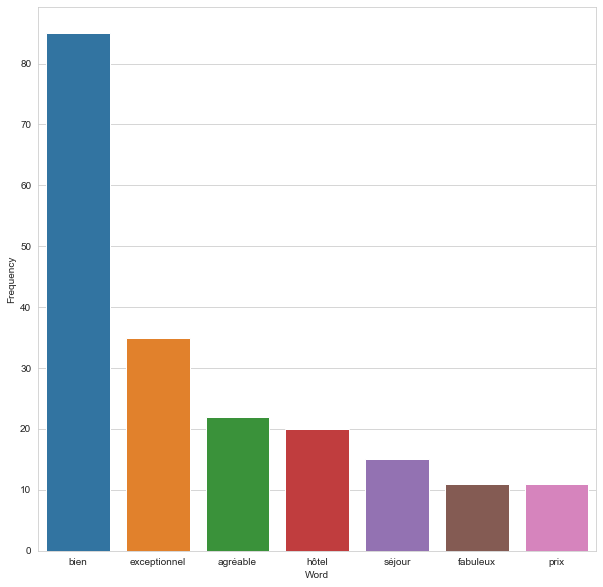

In [26]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

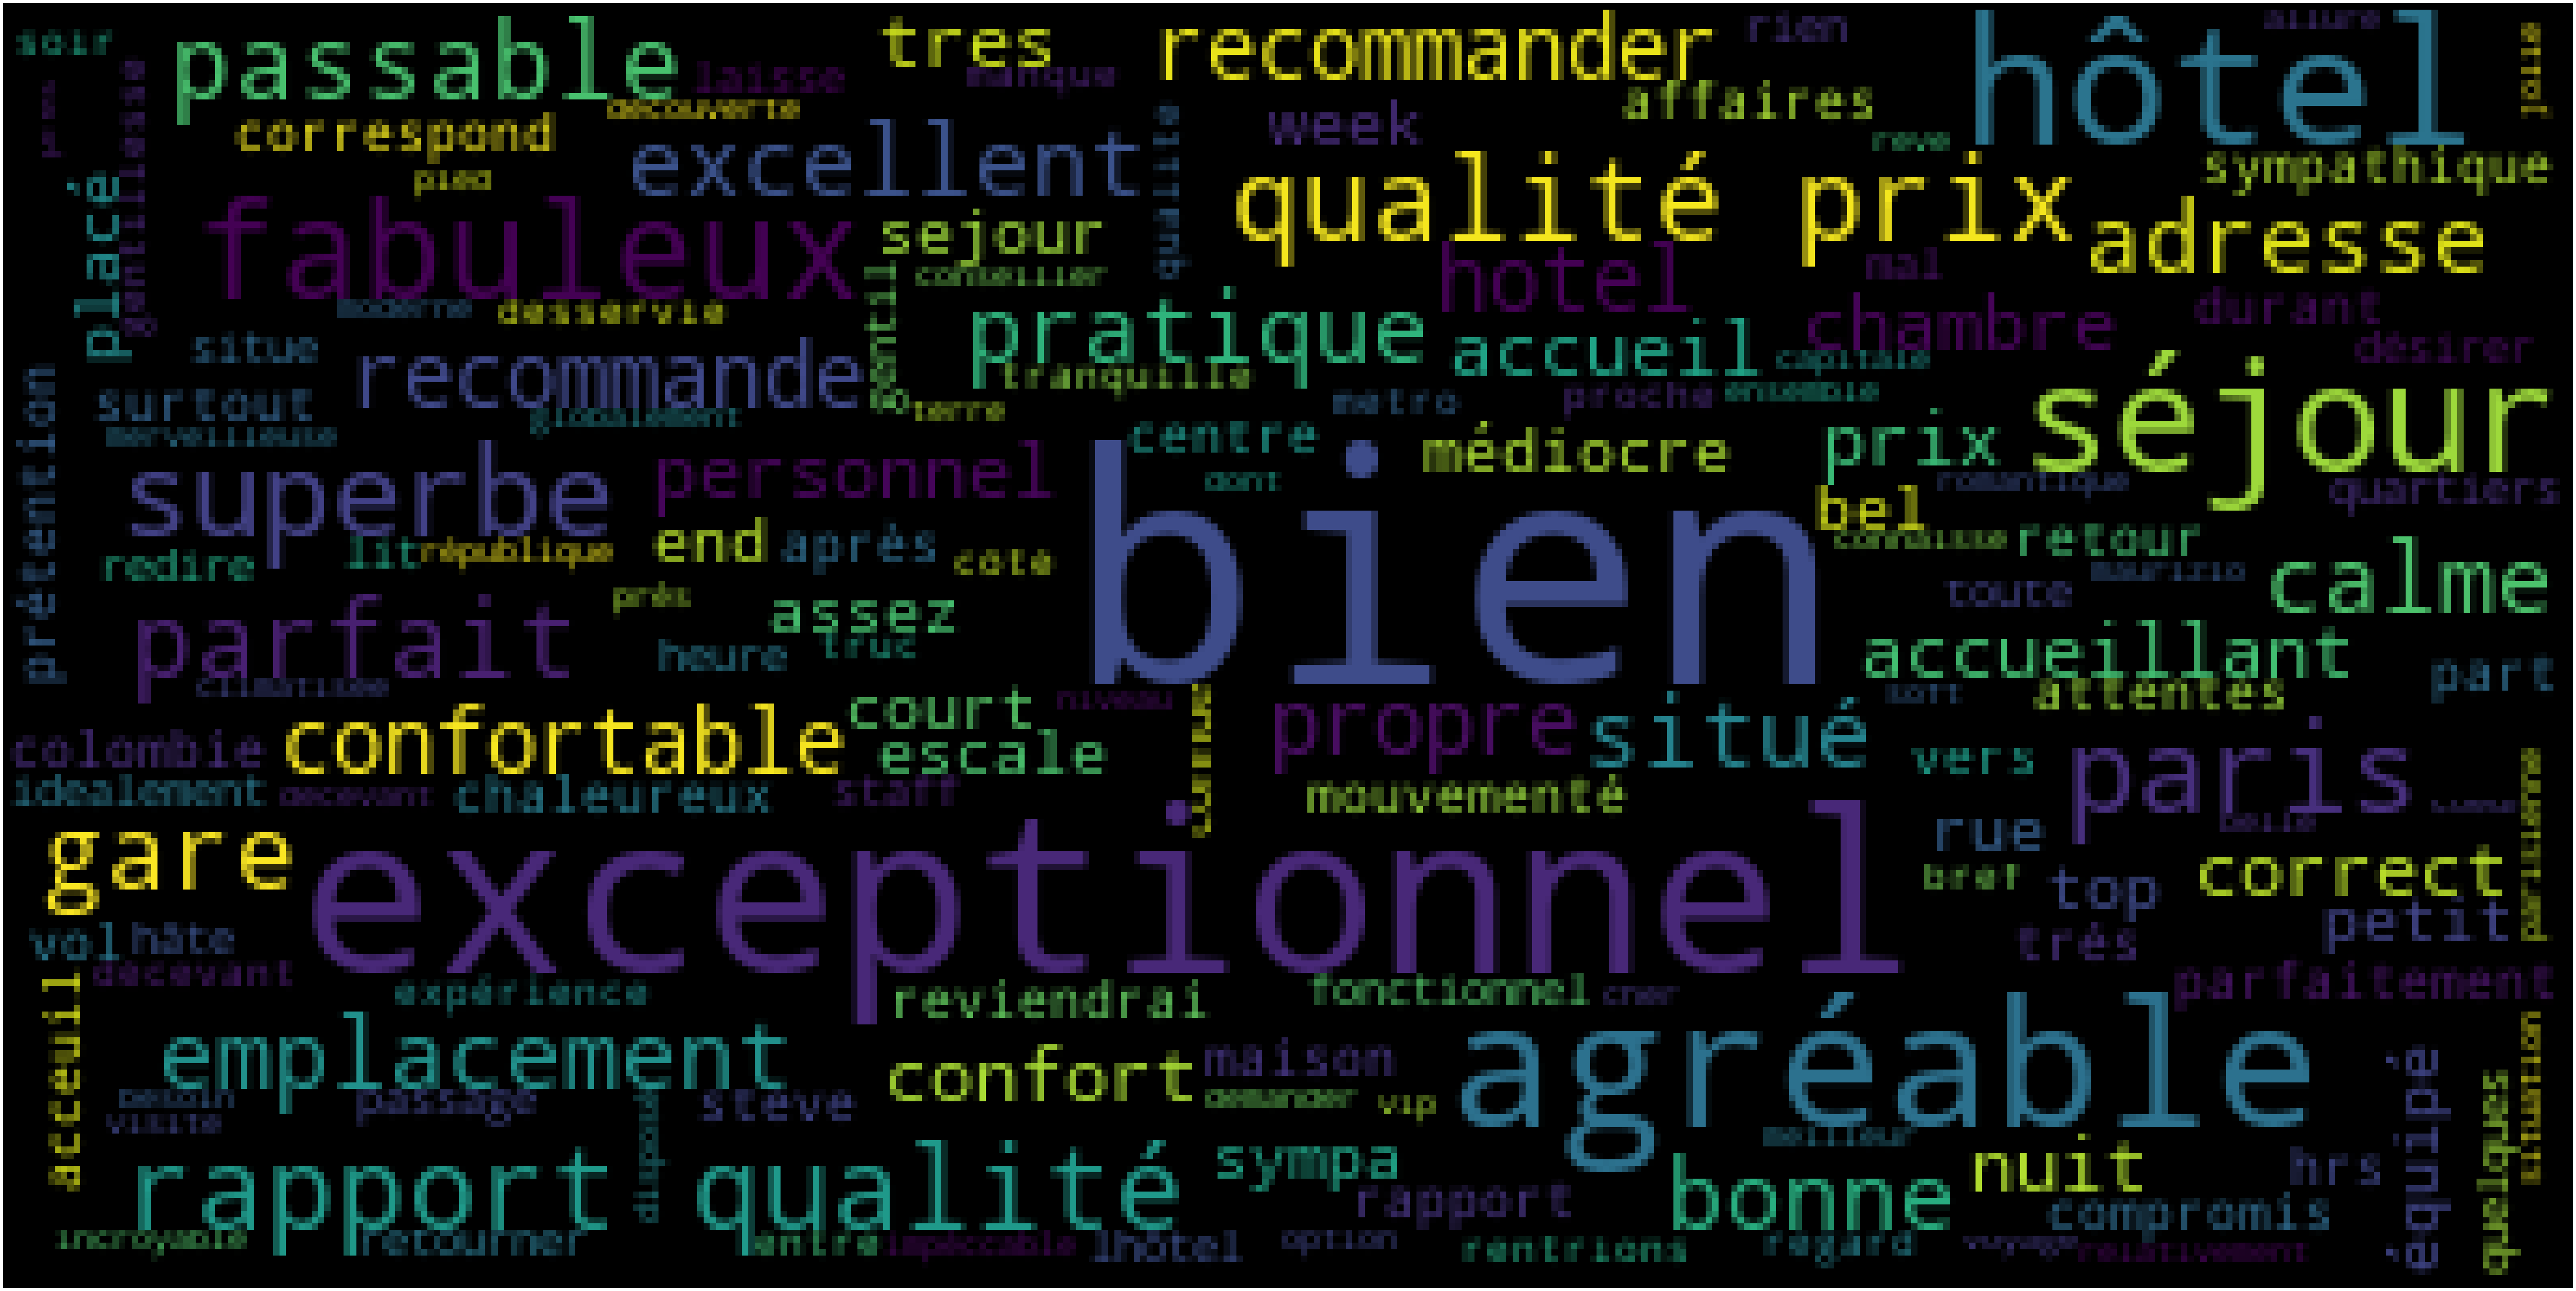

In [27]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [28]:
#mettre tous les éléments en miniscule, séparés par un espace
a = df['bons_points'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres and retourner une liste de mots
b = re.sub('[^a-zàâéèêëïîôùûç]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

In [29]:
#supprimer les caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [30]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

,Word,Frequency
0,personnel,90
1,accueil,86
2,chambre,85
3,bien,54
4,hôtel,48
5,calme,48
6,gare,45


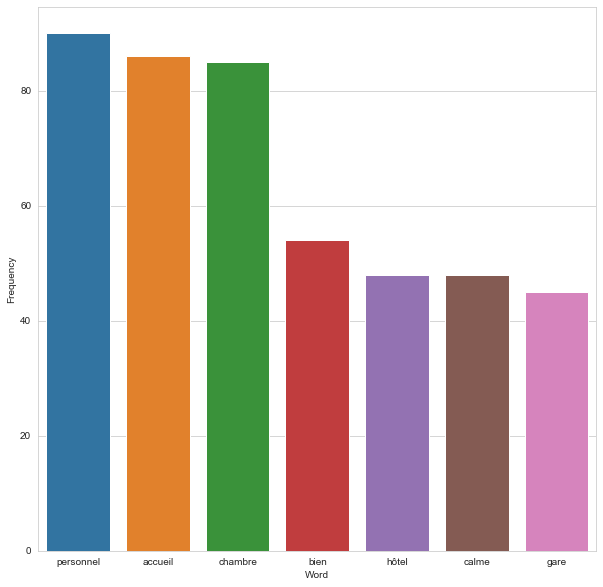

In [31]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

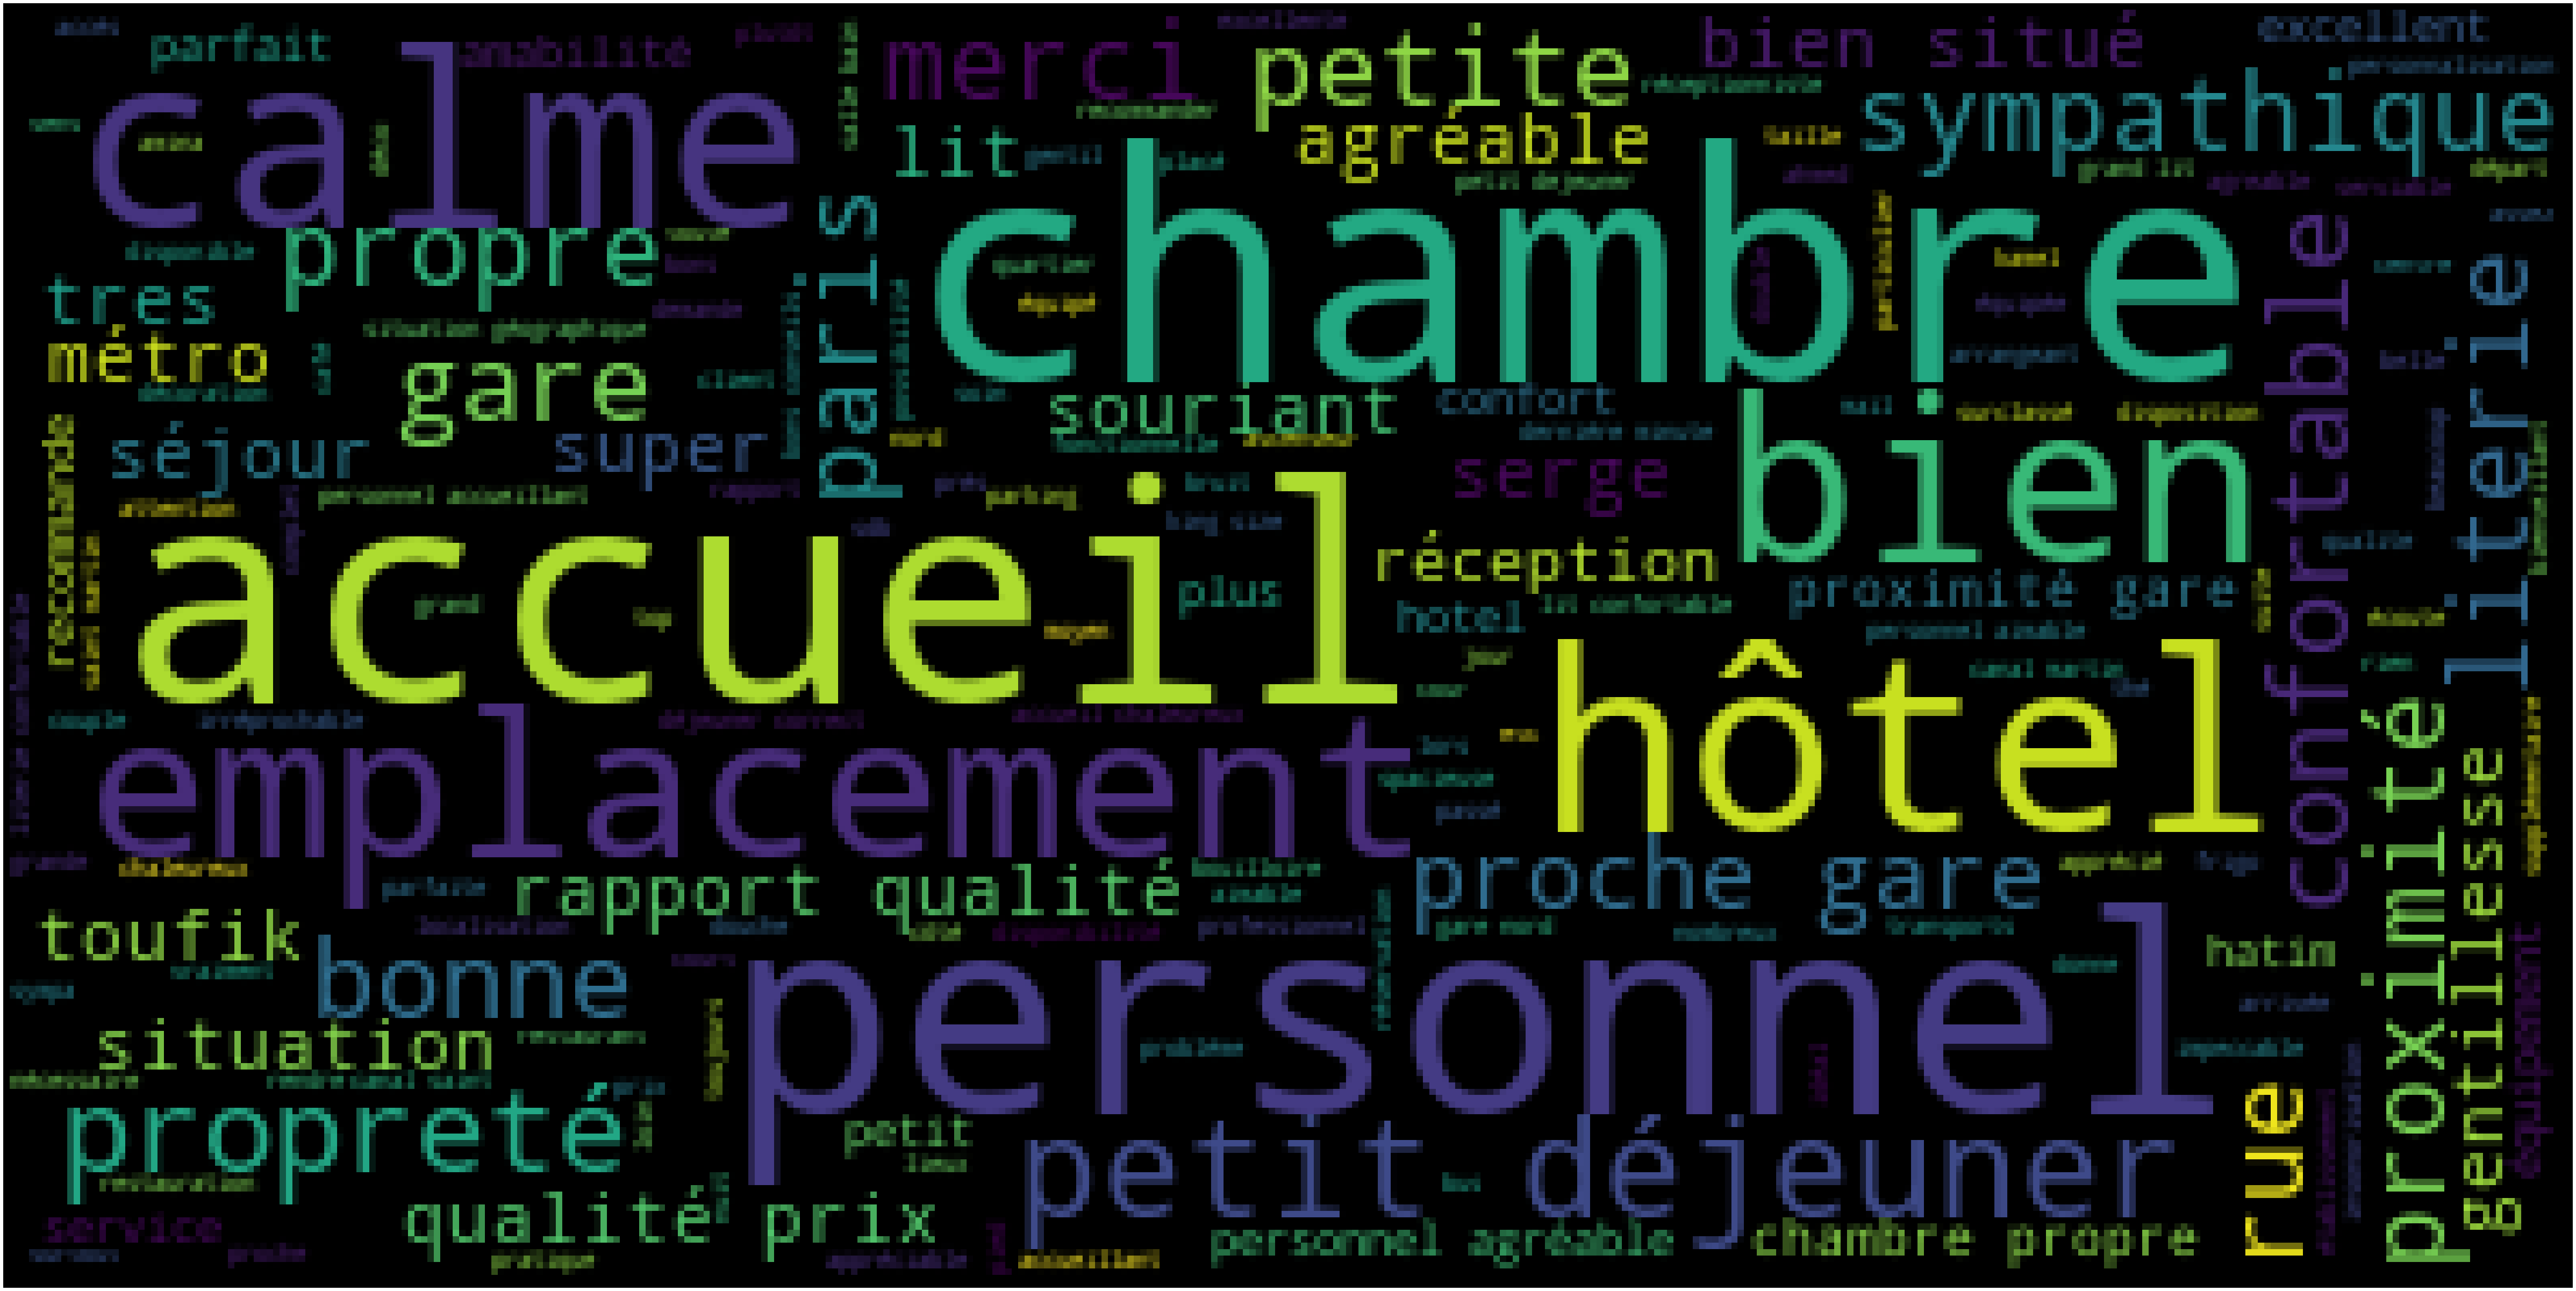

In [32]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [33]:
#mettre tous les éléments en miniscule, séparés par un espace
a = df['mauvais_points'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres and retourner une liste de mots
b = re.sub('[^A-Za-zàâéèêëïîôùûç]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

#supprimer caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [34]:
#supprimer caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [35]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

,Word,Frequency
0,chambre,61
1,petit,41
2,déjeuner,33
3,petite,32
4,salle,26
5,rien,16
6,bain,14


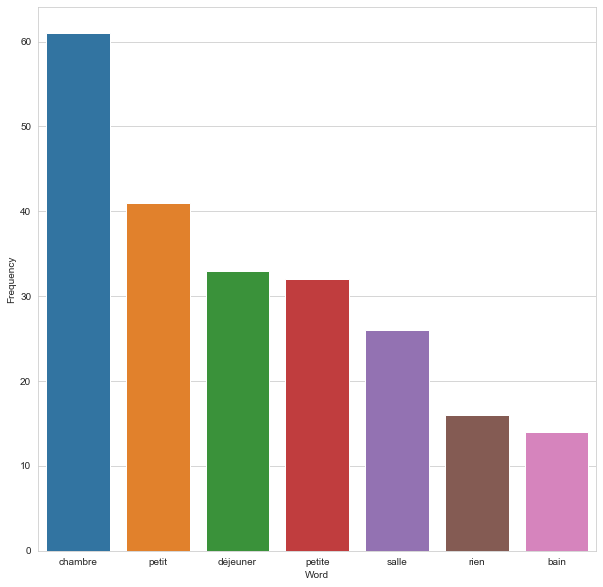

In [36]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

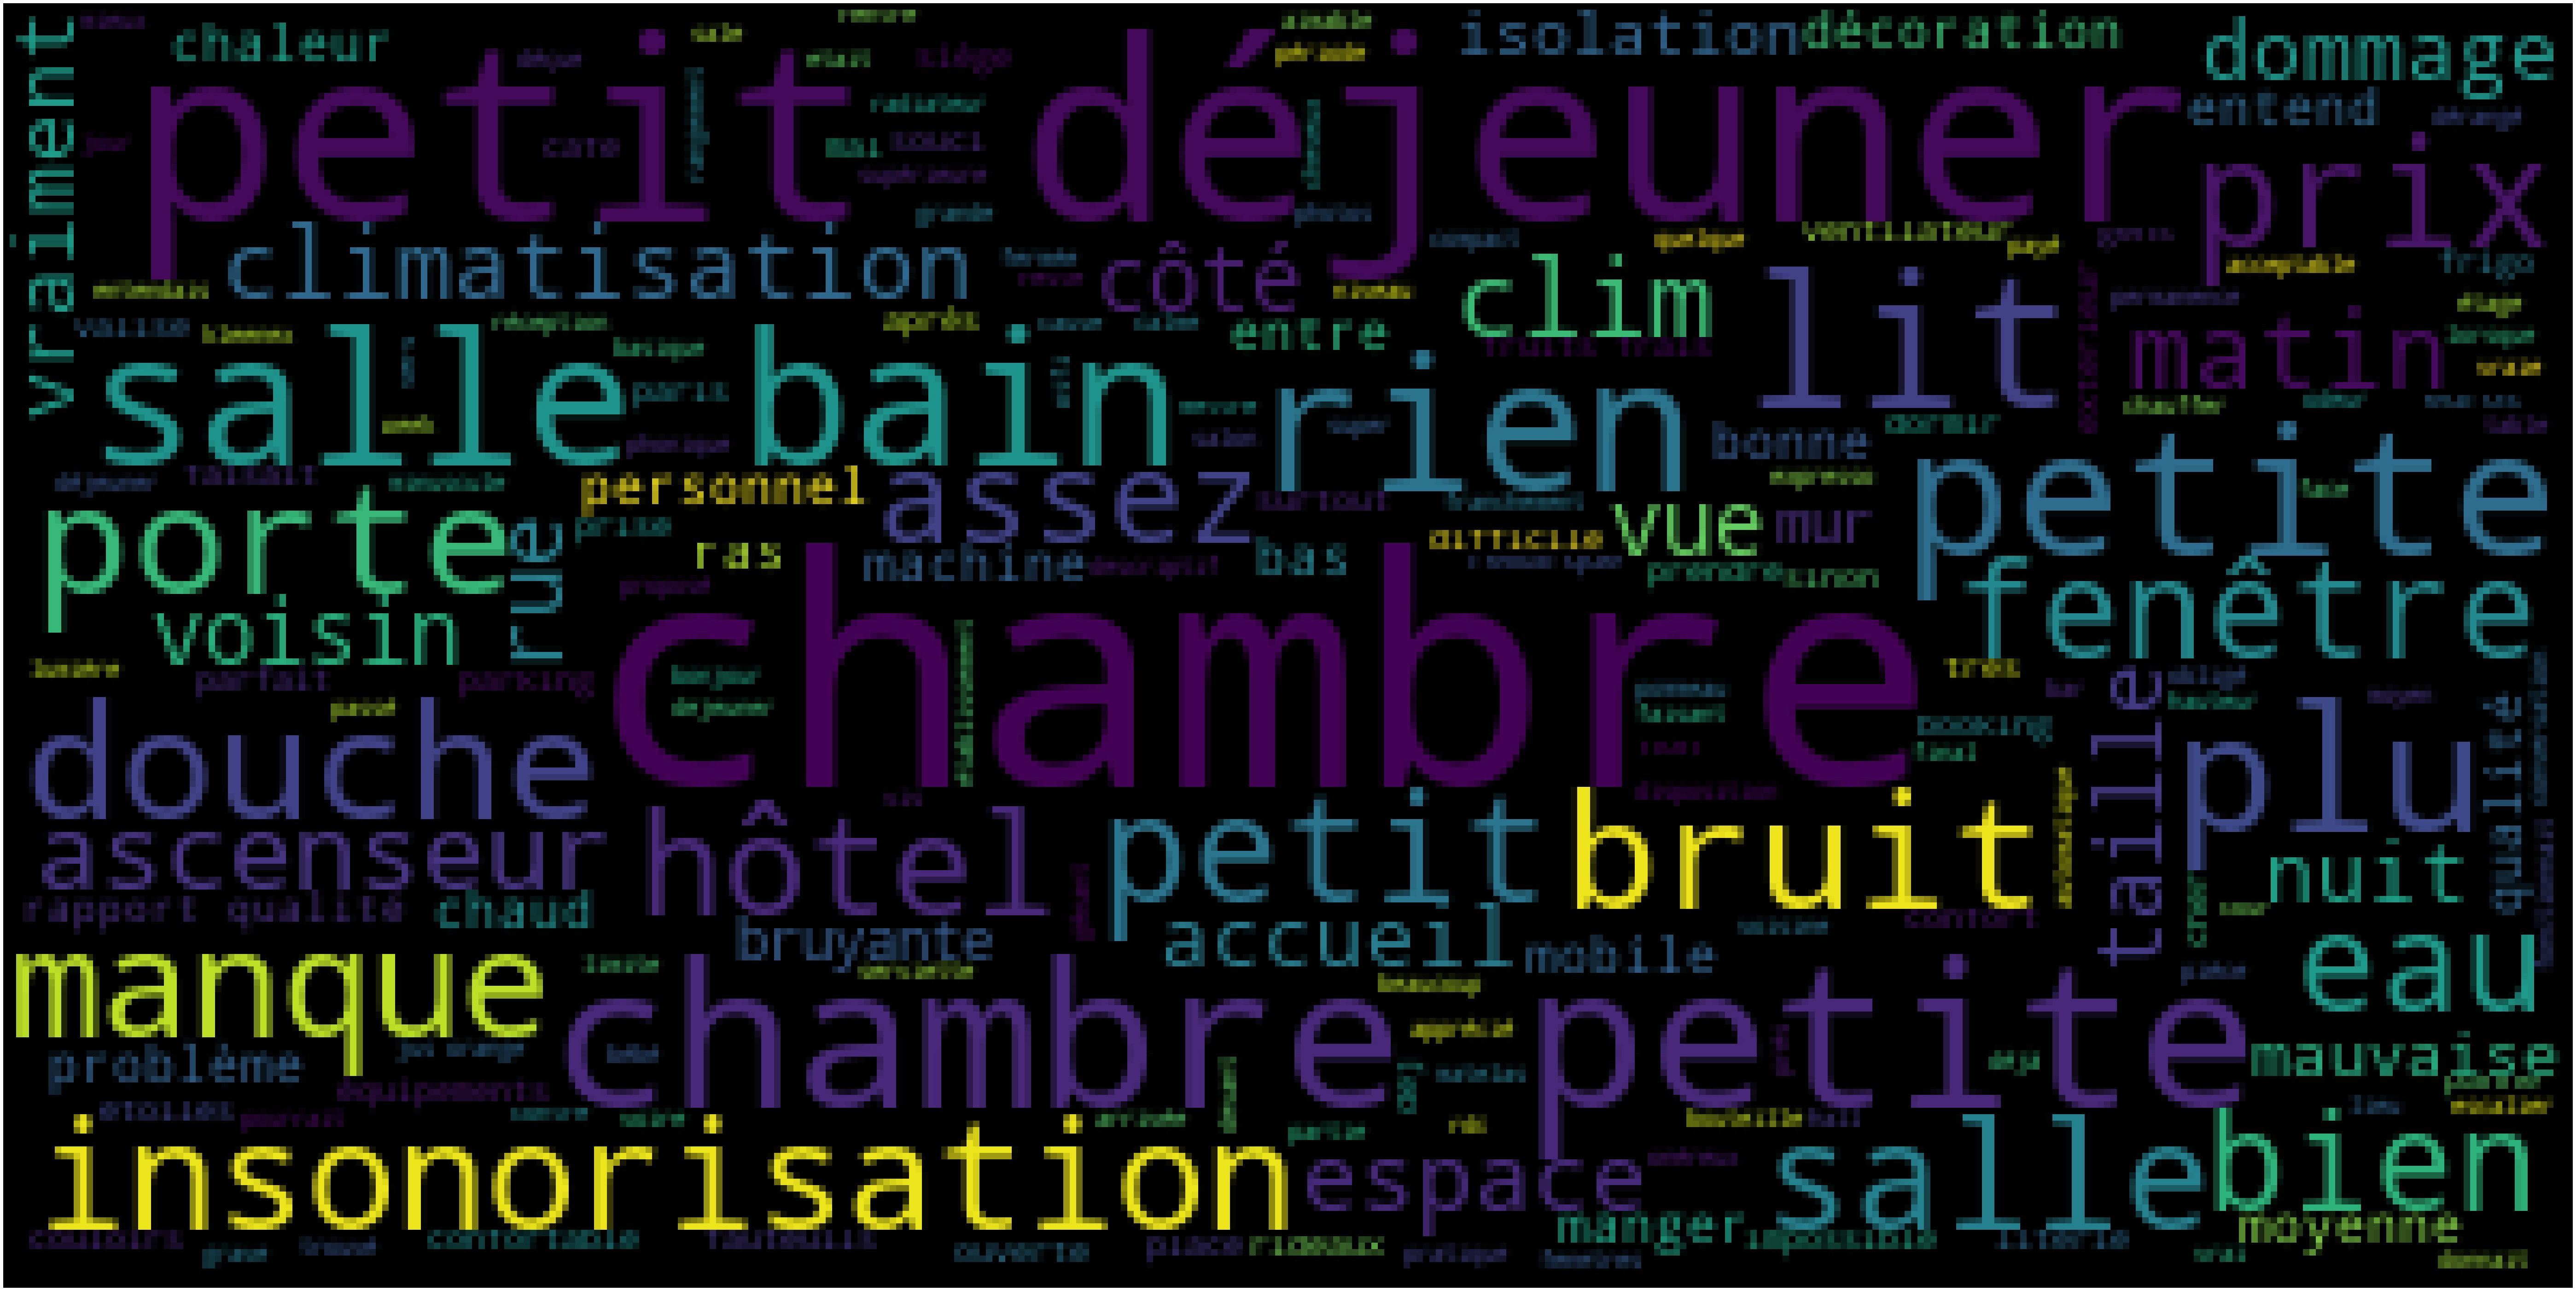

In [37]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [38]:
#vérification que les NaN dans la colonne 'mauvais points' ont bien de façon certaine une polarité de zéro pour TextBlob, 
#sentiment[0]=polarite et sentiment[1]=subjectivité
#text = u"NaN"
#blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
#blob.sentiment
#print('NaN a une polarité de {} et une subjectivité de {}.'.format(blob.sentiment[0], blob.sentiment[1]))

In [39]:
#suppression des Nan
#df = df.fillna('')
#suppression de deux phrases récurrentes dans les données
#df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

#df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [40]:
#suppression de deux phrases récurrentes dans les données
#df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

#df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [41]:
#concaténation 
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
df22 = pd.DataFrame(df, columns= ['bons_points', 'mauvais_points'])

df23=df22['bons_points']
df24=df22['mauvais_points']

In [42]:
df23=pd.DataFrame(data=df23)
#df23['polarite']=1
df23.head()

,bons_points
0,J'ai énormément apprécié l'accueil et je me su...
1,"Très bon accueil, Hatim le réceptionniste est ..."
2,- Personnel irréprochable : surtout l’homme et...
3,"Merci a Hatim pour l'accueil, très appréciable..."
4,"L’accueil , la situation de l’établissement"


In [43]:
df24=pd.DataFrame(data=df24)
#df24['polarité']=0
df24.columns = ['bons_points']
df24.head()

,bons_points
0,
1,
2,- le rapport qualité prix pour la chambre supé...
3,
4,La fenêtre qui ne fermait pas très bien


In [44]:
frames = [df23, df24]
result = pd.concat(frames)
result

,bons_points
0,J'ai énormément apprécié l'accueil et je me su...
1,"Très bon accueil, Hatim le réceptionniste est ..."
2,- Personnel irréprochable : surtout l’homme et...
3,"Merci a Hatim pour l'accueil, très appréciable..."
4,"L’accueil , la situation de l’établissement"
...,...
238,
239,Tout s’est bien passé
240,
241,Il n'est pas acceptable d'être un hôtel 3 étoi...


In [45]:
df21 = result['bons_points']
df21 = pd.DataFrame(df21, columns=['bons_points'])

In [46]:
df21.head()

,bons_points
0,J'ai énormément apprécié l'accueil et je me su...
1,"Très bon accueil, Hatim le réceptionniste est ..."
2,- Personnel irréprochable : surtout l’homme et...
3,"Merci a Hatim pour l'accueil, très appréciable..."
4,"L’accueil , la situation de l’établissement"


In [47]:
df21.columns=['sentences']

In [48]:
#mettre les commentaires du dataframe en miniscule
df21['sentences']=df21['sentences'].str.lower()
df21.head()

,sentences
0,j'ai énormément apprécié l'accueil et je me su...
1,"très bon accueil, hatim le réceptionniste est ..."
2,- personnel irréprochable : surtout l’homme et...
3,"merci a hatim pour l'accueil, très appréciable..."
4,"l’accueil , la situation de l’établissement"


In [49]:
df21.shape

(486, 1)

In [50]:
#remplacement de tout ce qui n'est pas dans le set[] par un espace
df21['sentences'] = df21['sentences'].apply(lambda x: re.sub('[^a-zàâéèêëïîôùûçæœ-]+',' ', str(x))) 
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [51]:
from nltk.corpus import stopwords
stop = stopwords.words('french')

In [52]:
#suppression des mots "vides" dans le dataframe
df21['sentences'] = df21['sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [53]:
#suppression des mots d'une longueur inférieure à 2 caractères
#\b=la fin et le début d'un mot
#`r' ou`R': préfixe pour les chaines de caractère 
df21['sentences']=df21.sentences.str.replace(r'\b(\w{1,2})\b', '')
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [54]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def return_stem(sentence):
    doc = nlp(sentence)
    return [stemmer.stem(X.text) for X in doc]

In [55]:
df22=df21.copy()

In [56]:
type(df22)

pandas.core.frame.DataFrame

In [57]:
df22.head()

,sentences
0,énormément apprécié accueil sentie vraiment ai...
1,très bon accueil hatim réceptionniste efficace...
2,- personnel irréprochable surtout homme femme ...
3,merci hatim accueil très appréciable recommande
4,accueil situation établissement


In [58]:
#Existe-t-il des variables numériques?
df21['sentences'].apply(lambda x: not any(i.isnumeric() for i in x.split())).any()

False

In [59]:
df21['sentences'].str.contains(r'[0-9]').any()

False

In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
#récupération des commentaires dans le type series
df21 = df21['sentences']
type(df21)

pandas.core.series.Series

In [62]:
#calcul de la polarité des commentaires avec TextBlob
bloblist_desc = list()

df_str=df21.astype(str)
for row in df_str:
    blob = TextBlob(row)
    #print(blob)
    pos_tagger=PatternTagger()
    analyzer=PatternAnalyzer()
    blob = tb(str(blob)) #textblob
    #sentiment renvoie un tuple avec la polarité et la subjectivite
    #print(blob.sentiment[0])
    #type(blob.sentiment[0])
    bloblist_desc.append(blob.sentiment[0])
    #df_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentiment'])

In [63]:
#récupération des résultats de la polarité dans un dataframe
df_polarity_desc1 = pd.DataFrame(data = bloblist_desc)
df_polarity_desc1.columns = ['sentiment']
df_polarity_desc1.head()

,sentiment
0,0.285000
1,0.402000
2,0.123333
3,0.186667
4,0.000000


In [64]:
#classification des commentaires selon trois modalités (neutres, positifs et négatifs) dans un dataframe
def f(df_polarity_desc1):
    if df_polarity_desc1['sentiment'] > 0:
        val = "positive"
    elif df_polarity_desc1['sentiment'] < 0:
        val = "negative"
    else :
        val = "neutre"
    return val

df_polarity_desc1.apply(f, axis=1)
df_polarity_desc1['polarite']=df_polarity_desc1.apply(f, axis=1)

In [65]:
df_polarity_desc1.head()

,sentiment,polarite
0,0.285000,positive
1,0.402000,positive
2,0.123333,positive
3,0.186667,positive
4,0.000000,neutre


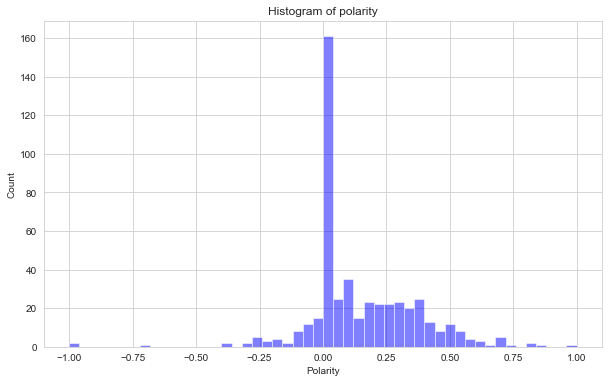

In [66]:
#fonction de masse de la polarité des commentaires
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_polarity_desc1.sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

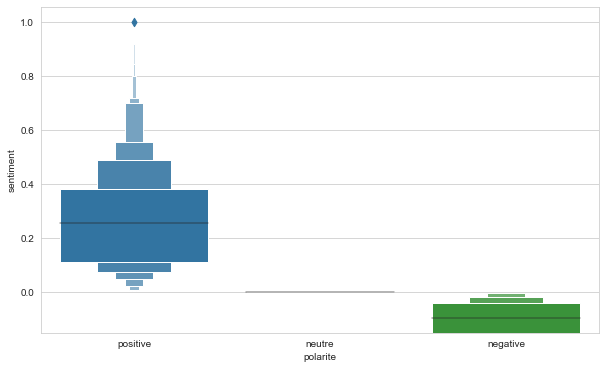

In [67]:
#boxenplot de la polarité des commenatires, boxplot avec plus de quartiles
plt.figure(figsize=(10,6))
sns.boxenplot(x='polarite', y='sentiment', data=df_polarity_desc1)
plt.show();

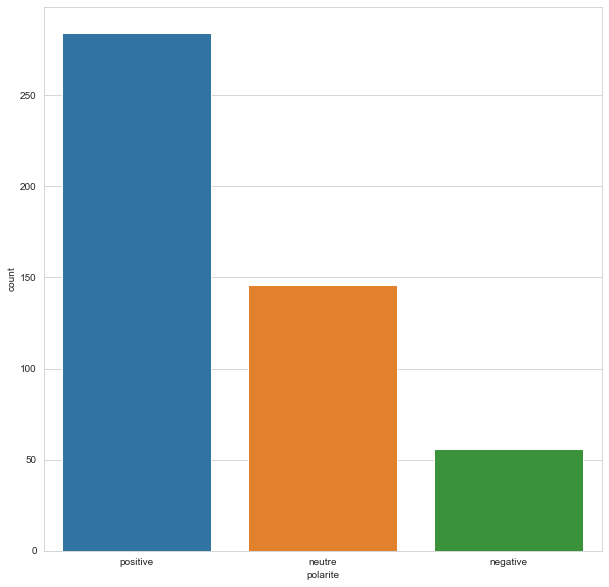

In [68]:
#countplot des modalités correspondant à la polarité des commentaires
df_polarity_desc1.head()
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="polarite", data=df_polarity_desc1)

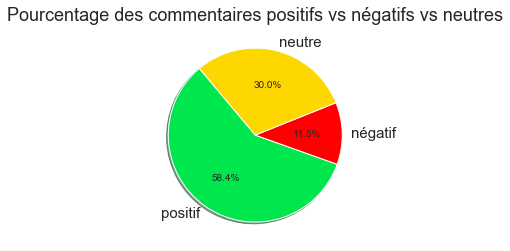

In [69]:
#diagramme circulaire des modalités de la polarité des commentaires
pourcentage_positive = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "positive")])) / len(df_polarity_desc1)
pourcentage_negative = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "negative")])) / len(df_polarity_desc1)
pourcentage_neutre = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "neutre")])) / len(df_polarity_desc1)

fig1, ax1 = plt.subplots()

plt.title("Pourcentage des commentaires positifs vs négatifs vs neutres", fontsize=18)
labels = ['positif', 'négatif', 'neutre']
sizes = [pourcentage_positive, pourcentage_negative, pourcentage_neutre]
#explode = (0, 0.2)  # seulement détacher le second groupe

patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow = True, startangle=130, colors = ['#00e64d', 'r', '#FFD700'])
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
texts[2].set_fontsize(15)

matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [6, 6]

In [70]:
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')
df23=df['note']
df24=df['note']
frames = [df23, df24]
df_notes = pd.concat(frames)
df_notes.shape

(778,)

In [71]:
type(df_notes)

pandas.core.series.Series

In [72]:
df_polarity_desc1_polarite = df_polarity_desc1.iloc[:,1]
#df_polarity_desc1_polarite = pd.DataFrame(df_polarity_desc1_polarite)
df_polarity_desc1_polarite.head()

0    positive
1    positive
2    positive
3    positive
4      neutre
Name: polarite, dtype: object

In [73]:
df_notes.reset_index(drop=True, inplace=True)
df_polarity_desc1_polarite.reset_index(drop=True, inplace=True)
df_corr = pd.concat([df_polarity_desc1_polarite, df_notes], axis = 1)

In [74]:
df_corr.head()

,polarite,note
0,positive,10.0
1,positive,8.0
2,positive,8.0
3,positive,8.0
4,neutre,8.0


In [75]:
df_corr=df_corr.loc[(df_corr.polarite=='positive')|(df_corr.polarite=='negative')]

In [76]:
type(df_corr)

pandas.core.frame.DataFrame

In [77]:
df_corr.head()

,polarite,note
0,positive,10.0
1,positive,8.0
2,positive,8.0
3,positive,8.0
5,positive,8.0


In [78]:
df_corr['polarite'] = np.where(df_corr['polarite'] == 'positive', 1, 0)
df_corr.head()

,polarite,note
0,1,10.0
1,1,8.0
2,1,8.0
3,1,8.0
5,1,8.0


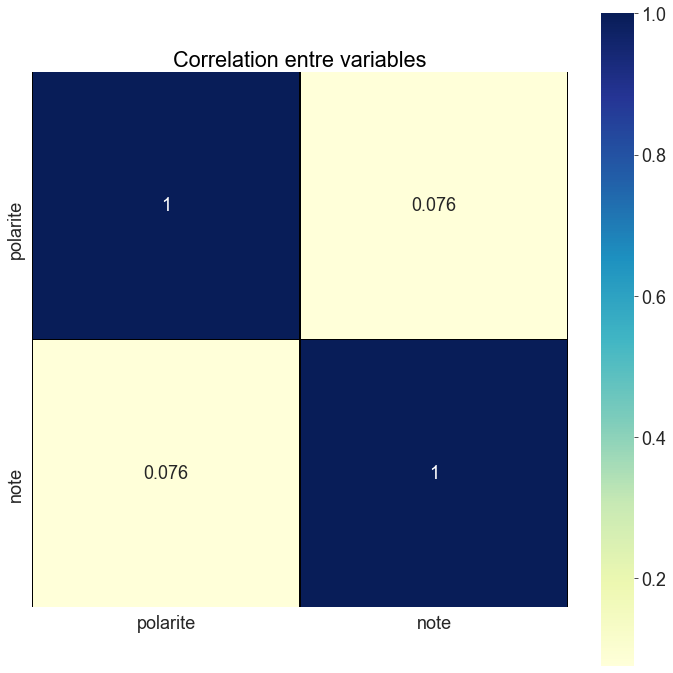

In [79]:
#affichage des corrélations entre variables
#parfaite si r = 1
#très forte si r > 0,8
#forte si r se situe entre 0,5 et 0,8
#d'intensité moyenne si r se situe entre 0,2 et 0,5
#faible si r se situe entre 0 et 0.2

f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(df_corr.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

In [80]:
#concaténation des trois colonnes correspondant aux commentaires sur les hôtels
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
df22 = pd.DataFrame(df, columns= ['titre', 'bons_points', 'mauvais_points'])

df21 = df22['titre'].map(str) + ' ' + df22['bons_points'].map(str) + ' ' + df22['mauvais_points'].map(str)

df21

0      Le confort comme à la maison ! J'ai énormément...
1      Calme et confortable. Très bon accueil, Hatim ...
2      Accueil chaleureux - Personnel irréprochable :...
3      Très correct Merci a Hatim pour l'accueil, trè...
4      Très bien L’accueil , la situation de l’établi...
                             ...                        
384    Agréable Ce client n'a pas laissé de commentai...
385    Passable Ce client n'a pas laissé de commentai...
386    Exceptionnel Ce client n'a pas laissé de comme...
387    Agréable Ce client n'a pas laissé de commentai...
388    Agréable Ce client n'a pas laissé de commentai...
Length: 389, dtype: object

In [81]:
#convertir series en dataframe
df21 = df21.to_frame(name="sentences")

In [82]:
#mettre les commentaires du dataframe en miniscule
df21['sentences']=df21['sentences'].str.lower()
df21.head()

,sentences
0,le confort comme à la maison ! j'ai énormément...
1,"calme et confortable. très bon accueil, hatim ..."
2,accueil chaleureux - personnel irréprochable :...
3,"très correct merci a hatim pour l'accueil, trè..."
4,"très bien l’accueil , la situation de l’établi..."


In [83]:
#remplacement de tout ce qui n'est pas dans le set[] par un espace
df21['sentences'] = df21['sentences'].apply(lambda x: re.sub('[^a-zàâéèêëïîôùûçæœ-]+',' ', str(x))) 
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [84]:
#suppression des mots "vides" dans le dataframe
stop = stopwords.words('french')
df21['sentences'] = df21['sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [85]:
#suppression des mots d'une longueur inférieure à 2 caractères
#\b=la fin et le début d'un mot
#`r' ou`R': préfixe pour les chaines de caractère 
df21['sentences']=df21.sentences.str.replace(r'\b(\w{1,2})\b', '')
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [86]:
df22=df21.copy()

In [87]:
type(df22)

pandas.core.frame.DataFrame

In [88]:
df22.head()

,sentences
0,confort comme maison énormément apprécié accue...
1,calme confortable très bon accueil hatim récep...
2,accueil chaleureux - personnel irréprochable s...
3,très correct merci hatim accueil très appréci...
4,très bien accueil situation établissement fenê...


In [89]:
#Existe-t-il des variables numériques?
df21['sentences'].apply(lambda x: not any(i.isnumeric() for i in x.split())).any()

False

In [90]:
#récupération des commentaires dans le type series
df21 = df21['sentences']
type(df21)

pandas.core.series.Series

In [91]:
#calcul de la polarité des commentaires avec TextBlob
bloblist_desc = list()

df_str=df21.astype(str)
for row in df_str:
    blob = TextBlob(row)
    #print(blob)
    pos_tagger=PatternTagger()
    analyzer=PatternAnalyzer()
    blob = tb(str(blob)) #textblob
    #sentiment renvoie un tuple avec la polarité et la subjectivite
    #print(blob.sentiment[0])
    #type(blob.sentiment[0])
    bloblist_desc.append(blob.sentiment[0])
    #df_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentiment'])

In [92]:
#récupération des résultats de la polarité dans un dataframe
df_polarity_desc1 = pd.DataFrame(data = bloblist_desc)
df_polarity_desc1.columns = ['sentiment']
df_polarity_desc1.head()

,sentiment
0,0.285000
1,0.354286
2,0.006111
3,0.340000
4,0.000000


In [93]:
#classification des commentaires selon trois modalités (neutres, positifs et négatifs) dans un dataframe
def f(df_polarity_desc1):
    if df_polarity_desc1['sentiment'] > 0:
        val = "positive"
    elif df_polarity_desc1['sentiment'] < 0:
        val = "negative"
    else :
        val = "neutre"
    return val

df_polarity_desc1.apply(f, axis=1)
df_polarity_desc1['polarite']=df_polarity_desc1.apply(f, axis=1)

In [94]:
#sélection de la colonne notes 
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')
df_notes = df.iloc[:,7]
#df_notes = pd.DataFrame(data=df_notes)
df_notes.head()

0    10.0
1     8.0
2     8.0
3     8.0
4     8.0
Name: note, dtype: float64

In [95]:
#sélection de la colonne polarite
df_polarity_desc1_polarite = df_polarity_desc1.iloc[:,1]
#df_polarity_desc1_polarite = pd.DataFrame(df_polarity_desc1_polarite)
df_polarity_desc1_polarite.head()

0    positive
1    positive
2    positive
3    positive
4      neutre
Name: polarite, dtype: object

In [96]:
#concaténation de la colonne notes et polarite
df_corr = pd.concat([df_polarity_desc1_polarite, df_notes], axis = 1)

In [97]:
#sélection des modalités postives ou négatives
df_corr=df_corr.loc[(df_corr.polarite=='positive')|(df_corr.polarite=='negative')]

In [98]:
#transformation des valeurs de la polarite en code binaire 0 et 1
df_corr['polarite'] = np.where(df_corr['polarite'] == 'positive', 1, 0)
df_corr.head()

,polarite,note
0,1,10.0
1,1,8.0
2,1,8.0
3,1,8.0
5,1,8.0


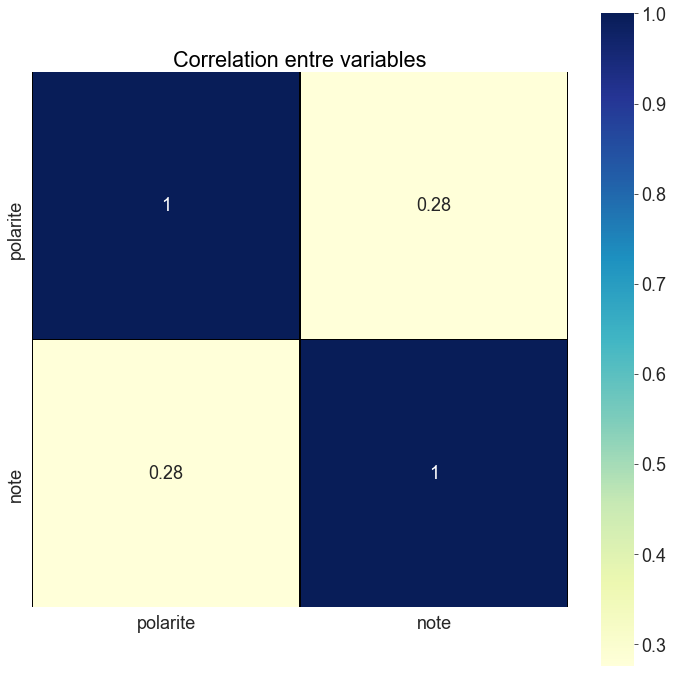

In [99]:
#affichage des corrélations entre variables
#parfaite si r = 1
#très forte si r > 0,8
#forte si r se situe entre 0,5 et 0,8
#d'intensité moyenne si r se situe entre 0,2 et 0,5
#faible si r se situe entre 0 et 0.2

f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(df_corr.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

In [100]:
#df_polarity_desc1.head()

In [101]:
#df_polarity_desc1.columns

In [102]:
#Transformation des valeurs de la variable polarite en 1 et 0
#pas besoin d'utiliser le module scikit-learn car on peut le faire directement 
df_polarity_desc1['polarite'] = np.where(df_polarity_desc1['polarite'] == 'positive', 1, 0)
df_polarity_desc1 = df_polarity_desc1.reset_index(drop=True)
df_polarity_desc1.head()

,sentiment,polarite
0,0.285000,1
1,0.354286,1
2,0.006111,1
3,0.340000,1
4,0.000000,0


In [103]:
#supression de la colonne sentiment
df_polarity_desc1.drop(['sentiment'],1,inplace=True)
df_polarity_desc1.head()

,polarite
0,1
1,1
2,1
3,1
4,0


In [104]:
#création d'un dataframe comments avec la colonne sentences
df21.head()
comments = pd.DataFrame(data=df21)
comments.columns = ['sentences']
comments.head()
comments.shape
type(comments)

pandas.core.frame.DataFrame

In [105]:
#df_polarity_desc1.shape
#type(df_polarity_desc1)

In [106]:
#concaténation de la colonne sentences et la colonne polarite
dataset = pd.concat([comments, df_polarity_desc1])

In [107]:
comments.reset_index(drop=True, inplace=True)
df_polarity_desc1.reset_index(drop=True, inplace=True)
# fusion des deux datasets en un seul que l'on nommera df
df = pd.concat([df_polarity_desc1, comments], axis = 1)
#df.head(100)

In [108]:
#renommer les colonnes
df.columns=['sentiment', 'sentence']
df.head()

,sentiment,sentence
0,1,confort comme maison énormément apprécié accue...
1,1,calme confortable très bon accueil hatim récep...
2,1,accueil chaleureux - personnel irréprochable s...
3,1,très correct merci hatim accueil très appréci...
4,0,très bien accueil situation établissement fenê...


In [109]:
#supression des données manquantes
df.isnull().values.any()
df.isnull().sum()
df=df.dropna()

In [110]:
#vérification des données manquantes
df.isnull().sum()

sentiment    0
sentence     0
dtype: int64

In [111]:
#création d'un csv contenant le dataframe df utilisé pour le machine learning
df.to_csv('booking.csv', index=True)

<h1>3. Machine learning</h1>

In [112]:
#création jeux train et test
X_train, X_test, y_train, y_test = train_test_split(df[['sentence']], df['sentiment'])

In [113]:
#CountVectorizer de Scikit-learn est utilisé pour transformer un corpus de mots en vecteurs/occurence des mots 
#Tf signifie term-frequency tandis que tfidf signifie inverse document-frequency
#IDF(word) = Log((Total number of documents)/(Number of documents containing the word))
pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe.fit(X_train['sentence'])
feat_train = pipe.transform(X_train['sentence'])
feat_train.shape

(291, 1160)

In [114]:
#minimum et maximum pour feat_train
feat_train.min(), feat_train.max()

(0.0, 0.7863282971032471)

In [115]:
#transformer sans entrainer sur notre jeu test
feat_test = pipe.transform(X_test['sentence'])
feat_test.shape

(98, 1160)

In [116]:
#arbre de décision
#définir les paramètres
#le paramètre max_depth est un seuil sur la profondeur maximale de l’arbre
"""L'indice de diversité de gini : probabilité pour chaque élément d'être choisi multipliée 
par la probabilité qu'il soit mal classé"""
"""L'entropie au lieu d'utiliser les probabilités simples applique le log2 des probabilités"""
param_grid = {'max_depth' : [400, 500], 
              'criterion' : ['gini', 'entropy']}
             
dtc = DecisionTreeClassifier(random_state=42)

dtc_grid = GridSearchCV(dtc, param_grid, cv=3)
 
#entrainer le modèle à partir de Grid Search
%time DTC = dtc_grid.fit(feat_train, y_train)

print(dtc_grid.best_score_.round(5))
print(dtc_grid.best_params_)

final_model = dtc_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 144 ms
0.9244
{'criterion': 'gini', 'max_depth': 400}


In [117]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       222

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [118]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.93      0.95      0.94        73

    accuracy                           0.91        98
   macro avg       0.88      0.87      0.88        98
weighted avg       0.91      0.91      0.91        98



In [119]:
def MatriceConfusion(model):
    y_pred = model.predict(feat_test)
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, pred_test)
    plt.matshow(cm)
    plt.title('Matrice de confusion', y=1.12)
    plt.colorbar()
    print(cm)
    plt.show()

[[20  5]
 [ 4 69]]


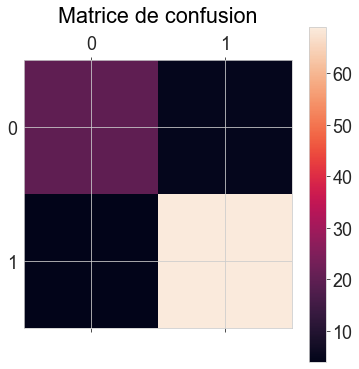

In [120]:
y_prediction = MatriceConfusion(DTC)

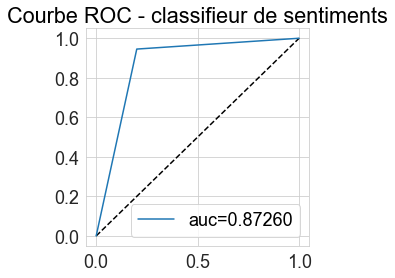

In [121]:
score = final_model.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [122]:
"""n_estimators = le nombre d'arbres dans la fôrét"""
"""Le Bootstrapping est un procédé qui permet d’augmenter artificiellement le nombre d’observation d’un 
échantillon de données sans pour autant modifier la distribution des variables présentes dans le jeu de 
données. Le principe est simple, on dispose d’un jeu de données contenant n observations, pour créer un 
échantillon de taille n  on tire avec remise n observations parmi le jeu de données original"""
param_grid = {'max_depth' : [400, 500],
             'n_estimators' : [50, 70],
              'bootstrap' : [True, False],
              'criterion' : ['gini','entropy']}

rfc = RandomForestClassifier(random_state=42)

rfc_grid = GridSearchCV(rfc, param_grid, cv = 3)

%time RFC = rfc_grid.fit(feat_train, y_train)

print(rfc_grid.best_score_.round(5))
print(rfc_grid.best_params_)

final_model = rfc_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 6.71 s
0.95533
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 400, 'n_estimators': 70}


In [123]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       222

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [124]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.91      0.97      0.94        73

    accuracy                           0.91        98
   macro avg       0.91      0.85      0.87        98
weighted avg       0.91      0.91      0.90        98



[[18  7]
 [ 2 71]]


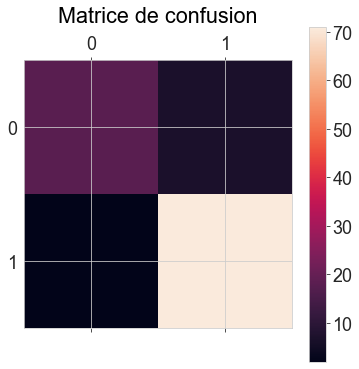

In [125]:
y_pred = MatriceConfusion(RFC)

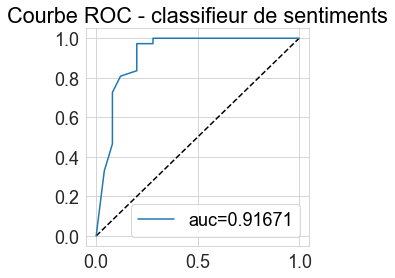

In [126]:
score = final_model.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [127]:
"""L1 : Lasso et L2 : Ridge, pénalité, c’est une modification qu’on apporte à la fonction de coût 
afin de maîtriser l’arbitrage entre biais vs variance"""
"""la fonction de coût est définie comme le carré de la différence entre la valeur prévue et la 
valeur réelle en fonction de l'intrant."""
"""quand le biais augmente, la variance baisse."""
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 73 ms
0.92784
{'penalty': 'l2'}


In [128]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        69
           1       0.94      1.00      0.97       222

    accuracy                           0.95       291
   macro avg       0.97      0.89      0.92       291
weighted avg       0.95      0.95      0.95       291



In [129]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        25
           1       0.90      1.00      0.95        73

    accuracy                           0.92        98
   macro avg       0.95      0.84      0.88        98
weighted avg       0.93      0.92      0.91        98



[[17  8]
 [ 0 73]]


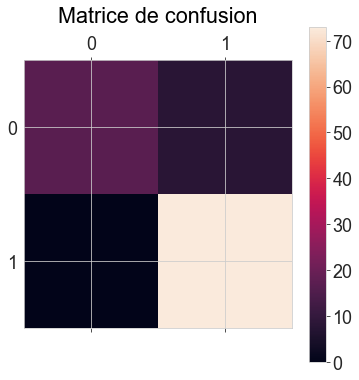

In [130]:
y_pred = MatriceConfusion(LR)

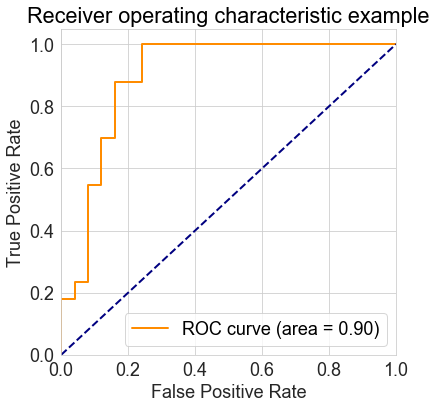

In [131]:
y_score = final_model.decision_function(feat_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [132]:
#bagging
"""Le mot Bagging est une contraction de Bootstrap Aggregation : sélection de sous-ensembles aléatoires de
l'ensemble des données d'origine, puis agrégation des prédictions individuelles pour former une prédiction
finale""" 

naivebayes = nb.BernoulliNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 1000, warm_start = True, bootstrap_features=True, max_samples=0.9)
modelB_fit = modelB.fit(feat_train, y_train)
modelB_fit.score(feat_test,y_test)
pred_train = modelB.predict(feat_train)
pred_test = modelB.predict(feat_test)

In [133]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.58      0.87      0.69        69
           1       0.95      0.80      0.87       222

    accuracy                           0.82       291
   macro avg       0.76      0.84      0.78       291
weighted avg       0.86      0.82      0.83       291



In [134]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        25
           1       0.89      0.85      0.87        73

    accuracy                           0.81        98
   macro avg       0.75      0.76      0.75        98
weighted avg       0.81      0.81      0.81        98



[[17  8]
 [11 62]]


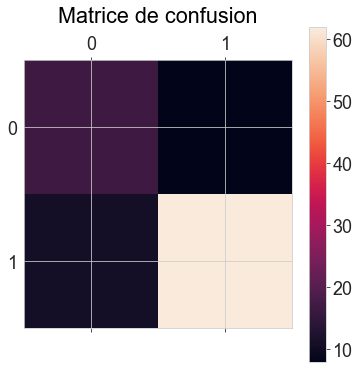

In [135]:
y_pred = MatriceConfusion(modelB_fit)

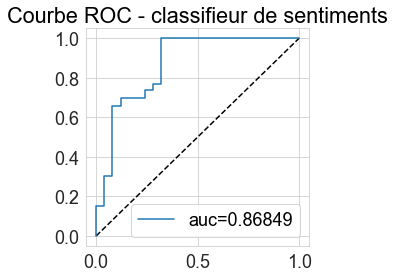

In [136]:
score = modelB_fit.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [137]:
param_grid = {'C': [10, 50, 100,200],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}

svm = SVC(random_state=42)

svm_grid = GridSearchCV(svm, param_grid, cv=3)

%time SVM = svm_grid.fit(feat_train, y_train)

print(svm_grid.best_score_.round(5))
print(svm_grid.best_params_)

Wall time: 70 ms
0.94845
{'kernel': 'sigmoid'}


In [138]:
final_model = svm_grid.best_estimator_

In [139]:
pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

In [140]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        69
           1       0.95      0.99      0.97       222

    accuracy                           0.95       291
   macro avg       0.96      0.91      0.93       291
weighted avg       0.95      0.95      0.95       291



In [141]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.92      1.00      0.96        73

    accuracy                           0.94        98
   macro avg       0.96      0.88      0.91        98
weighted avg       0.94      0.94      0.94        98



[[19  6]
 [ 0 73]]


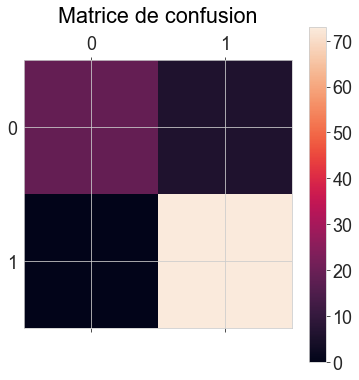

In [142]:
y_pred = MatriceConfusion(SVM)

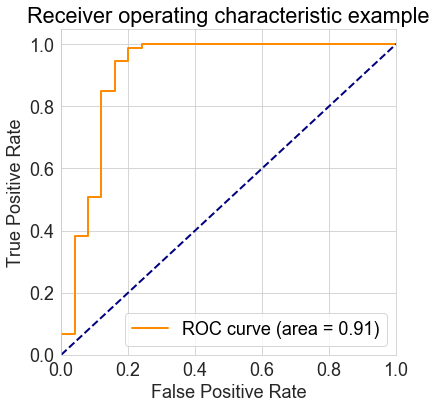

In [143]:
y_score = SVM.decision_function(feat_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [144]:
#gradient boosting = boosting + descente de gradient
#fonctionne de manière très similaire au forêts aléatoires pour la classification.
#néanmoins, les arbres ne sont plus appris indépendamment des autres 
"""Le BOOSTING est une technique ensembliste qui consiste à agréger des classifieurs (modèles) élaborés 
séquentiellement sur un échantillon d’apprentissage dont les poids des individus sont corrigés au fur et 
à mesure. Les classifieurs sont pondérés selon leurs performances"""
gbc40 = GradientBoostingClassifier(n_estimators=50, max_depth=500, learning_rate=0.08)
gbc40.fit(feat_train, y_train)
gbc40.score(feat_test, y_test)

0.9081632653061225

In [145]:
#gradient boosting = boosting + descente de gradient
#fonctionne de manière très similaire au forêts aléatoires pour la classification.
#néanmoins, les arbres ne sont plus appris indépendamment des autres 
"""Le BOOSTING est une technique ensembliste qui consiste à agréger des classifieurs (modèles) élaborés 
séquentiellement sur un échantillon d’apprentissage dont les poids des individus sont corrigés au fur et 
à mesure. Les classifieurs sont pondérés selon leurs performances"""
gbc40 = GradientBoostingClassifier(n_estimators=50, max_depth=500, learning_rate=0.6)
gbc40.fit(feat_train, y_train)
gbc40.score(feat_test, y_test)

0.9081632653061225

In [146]:
#param_grid = {
    #"learning_rate": [0.01, 0.1, 0.2],
    #"max_depth":[400, 500],
    #"criterion": ["friedman_mse", "mae", "mse"],
    #'n_estimators' : [50, 70]}

#gbc=GradientBoostingClassifier(random_state=42)

#gbc_grid = GridSearchCV(gbc, param_grid, cv = 3)

#%time GBC = gbc_grid.fit(feat_train, y_train)
#print (gbc_grid.best_score_.round(5))
#print(gbc_grid.best_params_)

#final_model = gbc_grid.best_estimator_

#pred_train = final_model.predict(feat_train) 
#pred_test = final_model.predict(feat_test)

In [147]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        69
           1       0.95      0.99      0.97       222

    accuracy                           0.95       291
   macro avg       0.96      0.91      0.93       291
weighted avg       0.95      0.95      0.95       291



In [148]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.92      1.00      0.96        73

    accuracy                           0.94        98
   macro avg       0.96      0.88      0.91        98
weighted avg       0.94      0.94      0.94        98



[[19  6]
 [ 0 73]]


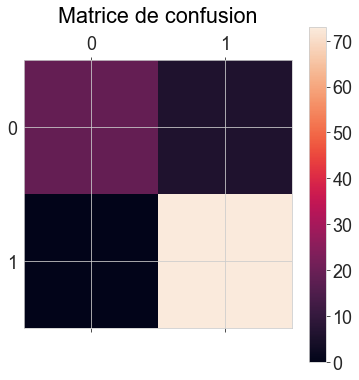

In [149]:
y_pred = MatriceConfusion(gbc40)

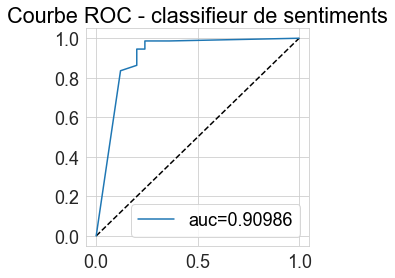

In [150]:
score = gbc40.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [151]:
#un n-gramme est “une sous-séquence de n éléments construite à partir d’une séquence donnée.” 
#n-gramme permet de créer un modèle probabiliste pour anticiper le prochain élément d’une suite
#padding="remplissage"
generated_ngrams = ngrams(word_tokenize(X_train.iloc[0,0]), 3, pad_left=True, pad_right=True)
list(generated_ngrams)[:7]

[(None, None, 'parfait'),
 (None, 'parfait', 'grand'),
 ('parfait', 'grand', 'lavabo'),
 ('grand', 'lavabo', 'sdb'),
 ('lavabo', 'sdb', 'literie'),
 ('sdb', 'literie', 'confortable'),
 ('literie', 'confortable', 'amabilité')]

In [152]:
#ngram_range of (1, 2) means unigrams and bigrams
#Un 2-gram (or bi-gram) est une séquance de 2 mots : “please turn”, “turn your” 
pipe2 = make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                      TfidfTransformer())
pipe2.fit(X_train['sentence'])
feat_train2 = pipe2.transform(X_train['sentence'])
feat_train2.shape

(291, 3998)

In [153]:
#get_feature_names() - retourne une liste de feature names, classés par leurs indices
cl = pipe2.steps[0]
cl[1].get_feature_names()[:10]

['absence',
 'absence porte',
 'acceptable',
 'acceptable sans',
 'acceptable être',
 'accepté',
 'accepté recevoir',
 'accessible',
 'accessible pied',
 'acceuillant']

In [154]:
feat_test2 = pipe2.transform(X_test['sentence'])

In [155]:
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train2, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

Wall time: 79 ms
0.93127
{'penalty': 'l2'}


In [156]:
feat_test2 = pipe2.transform(X_test['sentence'])

In [157]:
final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train2) 
pred_test = final_model.predict(feat_test2)

In [158]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        69
           1       0.94      1.00      0.97       222

    accuracy                           0.95       291
   macro avg       0.97      0.89      0.92       291
weighted avg       0.95      0.95      0.95       291



In [159]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        69
           1       0.94      1.00      0.97       222

    accuracy                           0.95       291
   macro avg       0.97      0.89      0.92       291
weighted avg       0.95      0.95      0.95       291



In [160]:
"""SVD est une technique de factorisation matricielle qui factorise une matrice M dans les trois matrices U,
Σ  et V. Très similaire à l'ACP, sauf que la factorisation pour SVD est effectuée sur la matrice de données, tandis que pour PCA, est une technique de factorisation matricielle qui factorise une matrice M dans les trois matrices U, Σ et V.Ceci est très similaire à l'ACP, sauf que la factorisation pour SVD est effectuée sur la matrice de données, 
pas sur la matrice de covariance."""
#n_components, dimensions qui doivent être inférieures aux colonnes
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=300))
pipe_svd.fit(X_train['sentence'])
feat_train_svd = pipe_svd.transform(X_train['sentence'])
feat_train_svd.shape

(291, 291)

In [161]:
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train_svd, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

Wall time: 94.9 ms
0.93814
{'penalty': 'l2'}


In [162]:
feat_test_svd = pipe_svd.transform(X_test['sentence'])

In [163]:
final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train_svd) 
pred_test = final_model.predict(feat_test_svd)

In [164]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.99      1.00      1.00       222

    accuracy                           0.99       291
   macro avg       1.00      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



In [165]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.91      0.99      0.95        73

    accuracy                           0.92        98
   macro avg       0.93      0.85      0.88        98
weighted avg       0.92      0.92      0.91        98



In [166]:
pipe_svd_tfidf = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     TruncatedSVD(n_components=300))
pipe_svd_tfidf.fit(X_train['sentence'])
feat_train_svd_tfidf = pipe_svd_tfidf.transform(X_train['sentence'])
feat_test_svd_tfidf = pipe_svd_tfidf.transform(X_test['sentence'])

In [167]:
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train_svd_tfidf, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

Wall time: 65 ms
0.92784
{'penalty': 'l2'}


In [168]:
final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train_svd_tfidf) 
pred_test = final_model.predict(feat_test_svd_tfidf)

In [169]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        69
           1       0.94      1.00      0.97       222

    accuracy                           0.95       291
   macro avg       0.97      0.89      0.92       291
weighted avg       0.95      0.95      0.95       291



In [170]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        25
           1       0.90      1.00      0.95        73

    accuracy                           0.92        98
   macro avg       0.95      0.84      0.88        98
weighted avg       0.93      0.92      0.91        98



In [171]:
pipe_svd_tfidf = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     TruncatedSVD(n_components=300))
pipe_svd_tfidf.fit(X_train['sentence'])
feat_train_svd_tfidf = pipe_svd_tfidf.transform(X_train['sentence'])

clf_svd_tfidf = LogisticRegression()
clf_svd_tfidf.fit(feat_train_svd_tfidf, y_train)

feat_test_svd_tfidf = pipe_svd_tfidf.transform(X_test['sentence'])
clf_svd_tfidf.score(feat_test_svd_tfidf, y_test)

0.9183673469387755

In [172]:
#deacc=True, enlève les ponctuations
from gensim.utils import tokenize
sentance = [list(tokenize(s, deacc=True, lower=True)) for s in X_train['sentence']]
sentance[0]

['parfait',
 'grand',
 'lavabo',
 'sdb',
 'literie',
 'confortable',
 'amabilite',
 'personnel',
 'vraie',
 'clim',
 'chambre',
 'non',
 'mobile']

In [173]:
#word2vec, réductions des dimensions
#paramètre : https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
from gensim.models import word2vec
model = word2vec.Word2Vec(sentance, size=300, window=20,
                          min_count=2, workers=1, iter=100)
model.corpus_count

291

In [174]:
vocab = model.wv.vocab
list(vocab)[:5]

['parfait', 'grand', 'sdb', 'literie', 'confortable']

In [175]:
model.save('trained_word2vec.bin')

In [176]:
model.wv['fabuleux'].shape, model.wv['fabuleux'][:10]

((300,),
 array([-0.01545087,  0.14786759,  0.10421147, -0.00847353,  0.16350581,
         0.04202674, -0.03981532, -0.3331205 , -0.08825884,  0.00760265],
       dtype=float32))

In [177]:
try:
    model.wv['rrrrrrrr']
except KeyError as e:
    print(e)

"word 'rrrrrrrr' not in vocabulary"


In [178]:
import numpy

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))


In [179]:

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)


In [180]:
def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

In [181]:

wv_train_feat = word2vec_features(X_train["sentence"], model)
#wv_train_feat.shape

In [182]:
import numpy

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(X_train["sentence"], model)
wv_train_feat.shape

(291, 300)

In [183]:
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(X_train["sentence"], model)
wv_train_feat.shape

(291, 300)

In [184]:
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
wv_test_feat = word2vec_features(X_test["sentence"], model)

In [186]:
clfwv.score(wv_test_feat, y_test)

0.7448979591836735

In [187]:
words = list(sorted(model.wv.vocab))
words[:10]

['acceptable',
 'acces',
 'accueil',
 'accueillant',
 'adorables',
 'adresse',
 'affaires',
 'agreable',
 'ahmed',
 'aide']

In [188]:
subset = ['exceptionnel', 'personnel', words[3], words[4], words[5]]
rows = []
for w in subset:
    for ww in subset:
        rows.append(dict(w1=w, w2=ww, d=model.wv.similarity(w, ww)))
import pandas
pandas.DataFrame(rows).pivot("w1", "w2", "d")

w2,accueillant,adorables,adresse,exceptionnel,personnel
w1,,,,,
accueillant,1.000000,0.907228,0.654536,0.860522,0.955485
adorables,0.907228,1.000000,0.552263,0.905150,0.799030
adresse,0.654536,0.552263,1.000000,0.329076,0.750030
exceptionnel,0.860522,0.905150,0.329076,1.000000,0.728138
personnel,0.955485,0.799030,0.750030,0.728138,1.000000


In [189]:
# y variable dépendante et X variables indépendantes
#X = df.iloc[:, df.columns !='polaritecomments'].values
#y = df.iloc[:, 5].values

In [190]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#print (X_train.shape,y_train.shape)
#print (X_test.shape, y_test.shape)

In [191]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [192]:
#train = pd.DataFrame(X_train)

In [193]:
#train.hist(figsize=(13,50),color='blue',bins=40,layout=(8,3))
#plt.show()

In [194]:
#param_grid = {'max_depth' : [3, 10, 15],
#    'random_state': [0, 42],
#             'n_estimators' : [10, 50]}
#grid = GridSearchCV( RandomForestClassifier(), param_grid)

#%time grid.fit(X_train, y_train)
#print(grid.best_params_)

#model = grid.best_estimator_
#yfit = model.predict(X_test)

In [195]:
#weights = (y == 0).sum() / (1.0 * (y == 1).sum())

In [196]:
#def get_score(model,X_train,X_test,y_train,y_test):
    #model.fit(X_train,y_train)
    #return model.score(X_test,y_test)

In [197]:
kf = KFold(n_splits=3)

LR = LogisticRegression()
SVM = SVC()
NB = nb.BernoulliNB()
DTC = DecisionTreeClassifier(max_depth = 5, random_state= 42)
RF = RandomForestClassifier(max_depth = 5, n_estimators= 10, random_state= 42)
XGBC = XGBClassifier(max_depth = 5, scale_pos_weight = weights, \
                n_jobs = 4)

logis=list()
svm=list()
nb=list()
arb=list()
rfl=list()
clf=list()

for index_train, index_test in kf.split(d_model):
    X_train, X_test, y_train, y_test = X[index_train], X[index_test], y[index_train], y[index_test]
    logis.append(get_score(LR, X_train, X_test, y_train, y_test))
    svm.append(get_score(SVM, X_train, X_test, y_train, y_test))
    nb.append(get_score(NB, X_train, X_test, y_train, y_test))
    arb.append(get_score(DTC, X_train, X_test, y_train, y_test))
    rfl.append(get_score(RF, X_train, X_test, y_train, y_test))
    clf.append(get_score(XGBC, X_train, X_test, y_train, y_test))
    
print(np.mean(logis))
print(np.mean(svm))
print(np.mean(arb))
print(np.mean(rfl))
print(np.mean(clf))

NameError: name 'weights' is not defined

In [ ]:
# y variable dépendante et X variables indépendantes
X = d_model.iloc[:, d_model.columns !='isFraud']
Y = d_model.iloc[:, 5]

X_t = pd.DataFrame(X_train)
feature_importances = pd.DataFrame(RF.feature_importances_, index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

In [ ]:
features = X.columns
importances=RF.feature_importances_
indices=np.argsort(importances)
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('importance du score');
plt.ylabel('variables indépendantes');
plt.title('Ordre d\'importance des variables indépendantes');
plt.show()

In [ ]:
def MatriceConfusion (model):
    y_pred = model.predict(X_test)
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.matshow(cm)
    plt.title('Matrice de confusion', y=1.12)
    plt.colorbar()
    print(cm)
    plt.show()

In [ ]:
y_pred = MatriceConfusion(LR)

In [ ]:
#NaiveBayes = muticlasses
#SVM = multiclasses